# 1.4 – Aggregations: Min, Max, and Everything in Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [2]:
import numpy as np

In [3]:
L = np.random.random(100)
sum(L)

51.06095027075165

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [4]:
np.sum(L)

51.06095027075163

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [6]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

224 ms ± 3.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
542 µs ± 9.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [7]:
min(big_array), max(big_array)

(1.6657746787496208e-06, 0.9999993025727744)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [8]:
np.min(big_array), np.max(big_array)

(1.6657746787496208e-06, 0.9999993025727744)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

141 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
656 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

4.997568640030536e-07 0.9999998363895959 500190.5171038556


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [4]:
M = np.random.random((3, 4))
print(M)

[[0.6802206  0.57930987 0.76184457 0.10323354]
 [0.88256412 0.64164508 0.01427147 0.00609231]
 [0.43070075 0.74962754 0.5129669  0.95268265]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [5]:
M.sum()

6.315159391518172

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each *column* by specifying ``axis=0``:

In [6]:
M.min(axis=0)

array([0.43070075, 0.57930987, 0.01427147, 0.00609231])

The function returns four values, corresponding to the four *columns* of numbers.

Similarly, we can find the maximum value within each *row*:

In [7]:
M.max(axis=1)

array([0.76184457, 0.88256412, 0.95268265])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

It is often desirable to round the output to two or three decimal places precision:

In [9]:
M.max(axis=1).round(3)

array([0.762, 0.883, 0.953])

**Your turn.** Create a $3\times 5$ array of random real numbers. Then find:
- row means
- minimum values within each column
- the overall minimum value

In [1]:
# write your code here



### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](L24_Missing_Values.ipynb)).

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

**Your turn.** Create a 10-component vector ``x`` of random integers from 1 to 10 (including 10). Then:
- use ``x = x.astype('float64')`` to change the dtype of ``x`` from ``int64`` to ``float64``
- find the minimum and maximum values and their indexes
- replace all the minimum and maximum values with the mean value
- verify that you have done everything correctly

In [2]:
# write your code here



## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the comma-separated values file ``data/president_heights.csv``:

In [1]:
!head -4 data/president_heights.csv # inspect the first four rows of the file

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


We'll use the Pandas package, which we'll explore more fully in [Part II](L21_Intro_to_Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [20]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [21]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [22]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Part III](L31_Intro_to_Matplotlib.ipynb)). For example, this code generates the following chart:

In [23]:
# the first line sets the plots to be inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

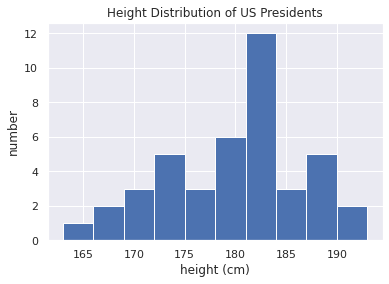

In [24]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

## Exercises

**Exercise 1.4.1** Create a $4\times5$ array of random integers in the range $[1,10]$. Then find:
- the sum of elements in each row,
- the sum of elements in each column,
- the total sum of elements,
- the product of elements in each row,
- the product of elements in each column,
- the total product of all elements.

In [3]:
# write your solution here



**Exercise 1.4.2** Numpy has its own method ``genfromtxt()`` to read data from a text file, see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html).
Execute the code below and explain the second result: why it is different from the first one?

In [32]:
data = pd.read_csv('data/president_heights_short.csv', index_col='order')
print(data)

                         name  height(cm)
order                                    
1           George Washington         189
2                  John Adams         170
3            Thomas Jefferson         189
4               James Madison         163
5                James Monroe         183
6           John Quincy Adams         171
7              Andrew Jackson         185
8            Martin Van Buren         168
9      William Henry Harrison         173
10                 John Tyler         183


In [30]:
data = np.genfromtxt('data/president_heights_short.csv', delimiter=',')
print(data)

[[ nan  nan  nan]
 [  1.  nan 189.]
 [  2.  nan 170.]
 [  3.  nan 189.]
 [  4.  nan 163.]
 [  5.  nan 183.]
 [  6.  nan 171.]
 [  7.  nan 185.]
 [  8.  nan 168.]
 [  9.  nan 173.]
 [ 10.  nan 183.]]


In [4]:
# write your solution here



**Exercise 1.4.3** Consider the reign of all monarchs of England.
This data is available in the comma-separated values file ``data/England.csv``:

In [10]:
!head -4 data/England.csv

757,796,Offa
802,839,Egbert 
839,856,Aethelwulf
856,860,Aethelbald


The first column is the year the monarch took the throne. The second columns is the last year their reign. Read the first two columns into a NumPy array and compute:

- the length of the longest reign
- the length of the shortest reign
- the mean reign length

In [5]:
# write your solution here



---

<!--NAVIGATION-->
< [1.3 - Computation on NumPy Arrays: Universal Functions](L13_Computation_on_Arrays_UFuncs.ipynb) | [Contents](../index.ipynb) | [1.5 – Computation on arrays broadcasting](L15_Computation_on_Arrays_Broadcasting.ipynb) >

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; also available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*